In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mutagen.mp3 import MP3
import json
import os
import seaborn as sns
from scipy import stats

sns.set(color_codes=True)

In [31]:
# df = pd.read_csv("cv-valid-train.csv")
# config = json.load(open("config.json"))
# for i, row in df.iterrows(): 
#     audio = MP3("/Users/laithalzyoud/" + row['filename'])
#     duration_val = audio.info.length
#     df.at[i,'duration'] = duration_val
# df.to_csv("cv-valid-train_new.csv")

In [44]:
df_before = pd.read_csv("cv-valid-train.csv")
df_after = pd.read_csv("results/balanced_filtered_features.csv")


# men_ages = df.loc[df['gender'] == 'male', 'age'].values
# women_ages = df.loc[df['gender'] == 'women', 'age'].values


# print(men_ages)


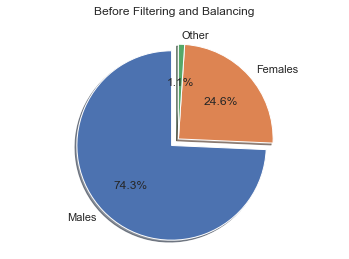

In [45]:
## Plot genders before

labels = 'Males', 'Females', 'Other'
sizes_before = [len(df_before.loc[df_before['gender'] == 'male'].index), len(df_before.loc[df_before['gender'] == 'female'].index), len(df_before.loc[df_before['gender'] == 'other'].index)]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes_before, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Before Filtering and Balancing",None,'center',20)
plt.show()

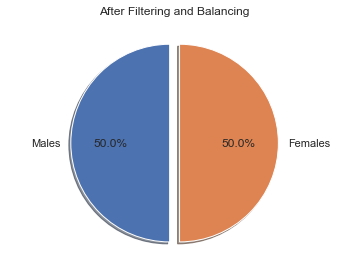

In [46]:
## Plot genders after

labels = 'Males', 'Females'
sizes_after = [len(df_after.loc[df_after['gender'] == 'male'].index), len(df_after.loc[df_after['gender'] == 'female'].index)]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes_after, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("After Filtering and Balancing",None,'center',20)
plt.show()

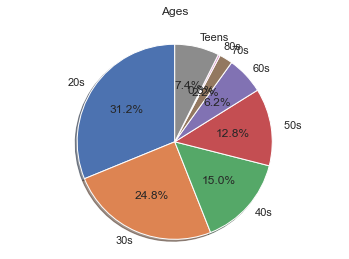

In [47]:
## Plot ages

labels = '20s', '30s', '40s', ' 50s','60s','70s','80s','Teens'
ages = [len(df_before.loc[df_before['age'] == 'twenties'].index), len(df_before.loc[df_before['age'] == 'thirties'].index)
       ,len(df_before.loc[df_before['age'] == 'fourties'].index), len(df_before.loc[df_before['age'] == 'fifties'].index)
       ,len(df_before.loc[df_before['age'] == 'sixties'].index), len(df_before.loc[df_before['age'] == 'seventies'].index)
       ,len(df_before.loc[df_before['age'] == 'eighties'].index), len(df_before.loc[df_before['age'] == 'teens'].index)]

fig1, ax1 = plt.subplots()
ax1.pie(ages, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Ages",None,'center',20)
plt.show()

36498
4.129097484793687
41 Hours


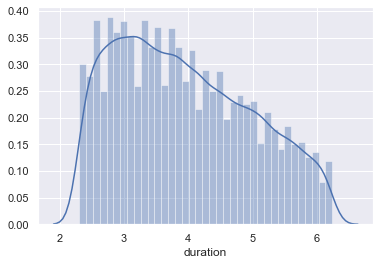

In [87]:
##Plot durations
df_before = df_before[np.logical_or(df_before['gender'] == 'female', df_before['gender'] == 'male')]
balanced = df_before.groupby('gender')
balanced = pd.DataFrame(balanced.apply(lambda x: x.sample(balanced.size().min()).reset_index(drop=True)))
x = balanced['duration']
print(len(x))
print(x.mean())
print(int(x.sum()/3600), "Hours") 
x = x[x.between(x.quantile(.1), x.quantile(.9))] # without outliers
sns.distplot(x);